In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from nanonets import Simulation

plt.style.use(["science","bright","grid"])

topo    = {"Nx": 1,"Ny": 1, "electrode_type": ['constant','constant']}
sim_c   = Simulation(topo)
ele_c   = sim_c.ELE_CHARGE_A_C
cap_t   = sim_c.get_capacitance_matrix()[0]
cap_g   = sim_c.self_capacitance_sphere(3.9,10.0)
cap_m   = sim_c.mutual_capacitance_adjacent_spheres(2.6,10.0,10.0,1.0)
def s_i_th(Ug, n):
    return ((n+0.5)*ele_c + cap_g*Ug)/(cap_t-cap_m)
def i_d_th(Ug, n):
    return ((0.5-n)*ele_c - cap_g*Ug)/(cap_m)

/home/jonasmensing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
data1   = pd.read_csv("data/set_0.000_True.csv")
data2   = pd.read_csv("data/set_0.000_False.csv")
j       = data1['Jumps'].values
x1      = data1['E0'].values*1000
x2      = data2['E0'].values*1000
y1      = data1['Observable'].values*1e-6
y2      = data2['Observable'].values*1e-6
y1_e    = data1['Error'].values*1e-6
y2_e    = data1['Error'].values*1e-6
p1      = pd.read_csv("data/mean_state_set_0.000_True.csv").iloc[:,2].values
q1      = p1 * cap_t / sim_c.ELE_CHARGE_A_C
p2      = pd.read_csv("data/mean_state_set_0.000_False.csv").iloc[:,2].values
q2      = p2 * cap_t / sim_c.ELE_CHARGE_A_C

[-34.85380914]
[-11.61793638]
[11.61793638]
[34.85380914]


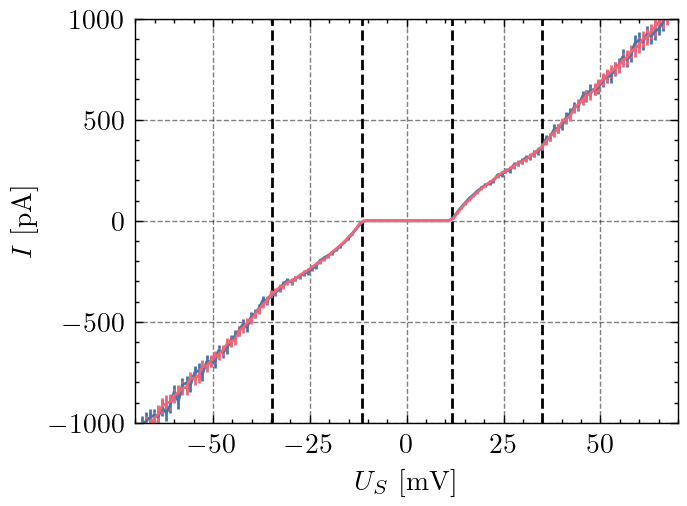

In [13]:
fig, ax = plt.subplots(dpi=200)
for i in range(-2,2):
    _   = plt.axvline(s_i_th(0,i)*1000, color='black', ls='--')
    print(s_i_th(0,i)*1000)
    # _   = plt.axvline(i_d_th(0,i)*1000, color='black', ls='--')
_   = ax.errorbar(x1, y1, y1_e)
_   = ax.errorbar(x2, y2, y2_e)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$I$ [pA]")
_   = ax.set_xlim(-70,70)
_   = ax.set_ylim(-1000,1000)

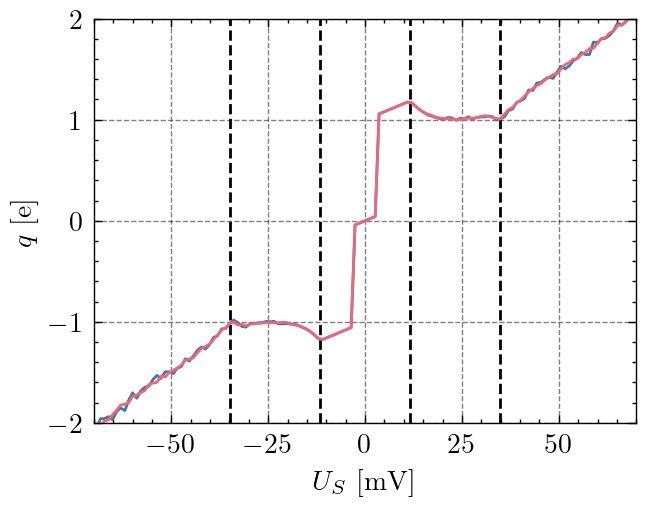

In [5]:
fig, ax = plt.subplots(dpi=200)
for i in range(-2,2):
    _ = plt.axvline(s_i_th(0,i)*1000, color='black', ls='--')
_   = ax.errorbar(x1, q1)
_   = ax.errorbar(x2, q2)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$q$ [e]")
_   = ax.set_xlim(-70,70)
_   = ax.set_ylim(-2,2)

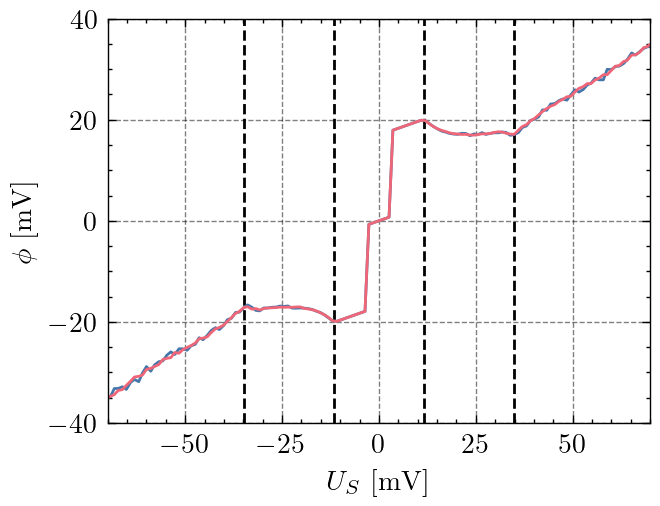

In [6]:
fig, ax = plt.subplots(dpi=200)
for i in range(-2,2):
    _   = plt.axvline(s_i_th(0,i)*1000, color='black', ls='--')
_   = ax.errorbar(x1, p1*1000)
_   = ax.errorbar(x2, p2*1000)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$\phi$ [mV]")
_   = ax.set_xlim(-70,70)
_   = ax.set_ylim(-40,40)